In [13]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.11.0
19.24.0


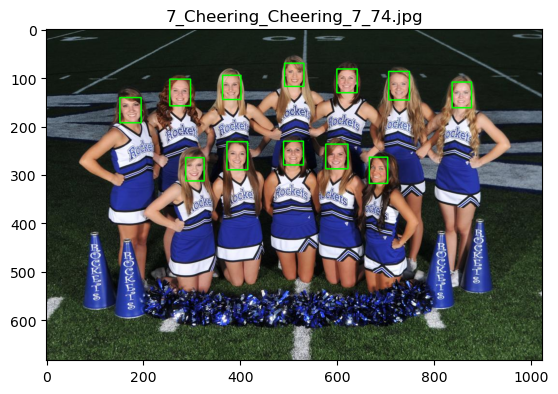

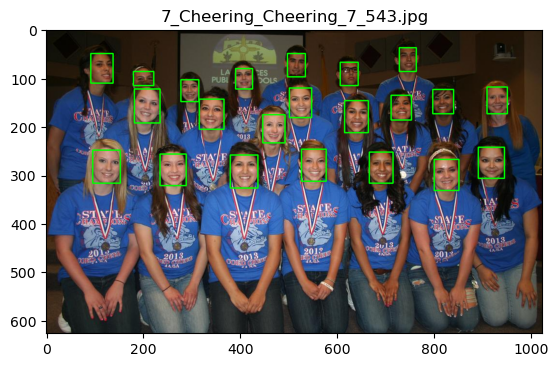

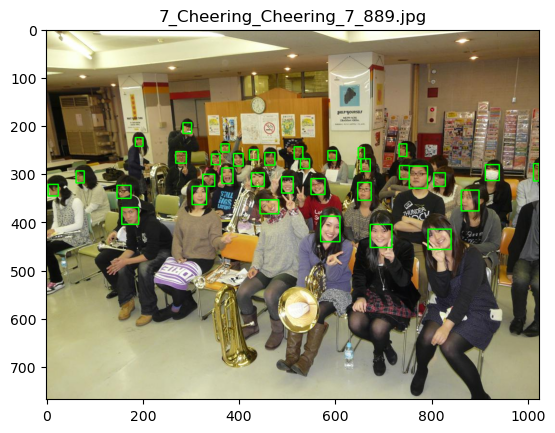

Successfully save all the crop faces into save_dir.
Checking cropped images...
7_Cheering_Cheering_7_74 12


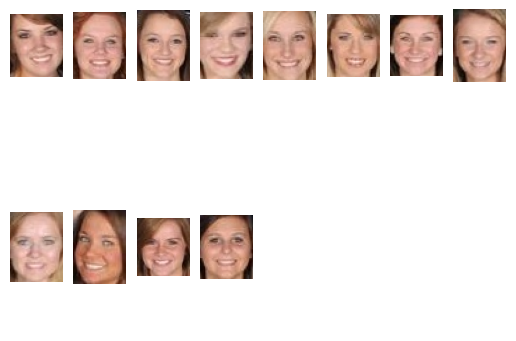

7_Cheering_Cheering_7_543 22


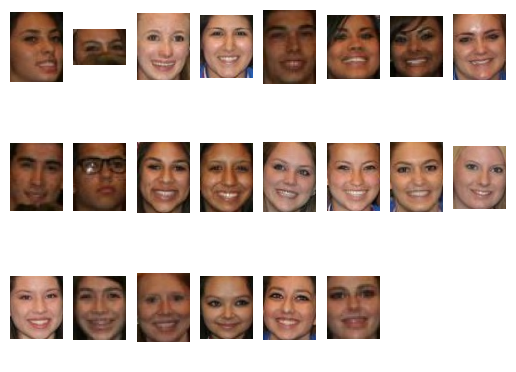

7_Cheering_Cheering_7_889 35


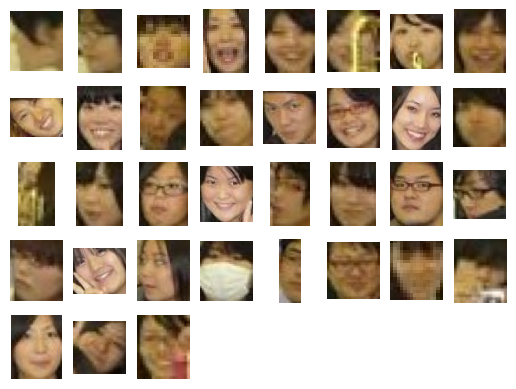

Face Detection using dlib:
Before resizing the image, the original shape of image is (683, 1024, 3)
7_Cheering_Cheering_7_74.jpg 12


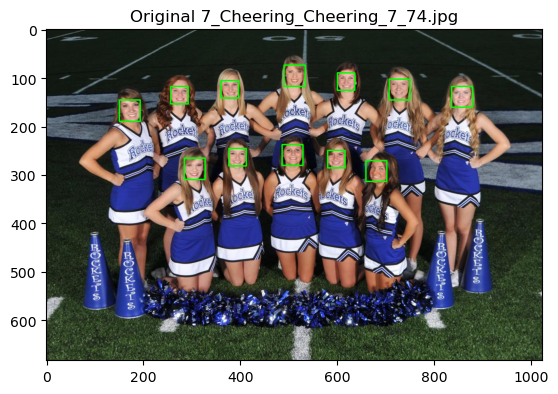

After resizing the image, the new shape of image is (1400, 2098, 3)
7_Cheering_Cheering_7_74.jpg 12


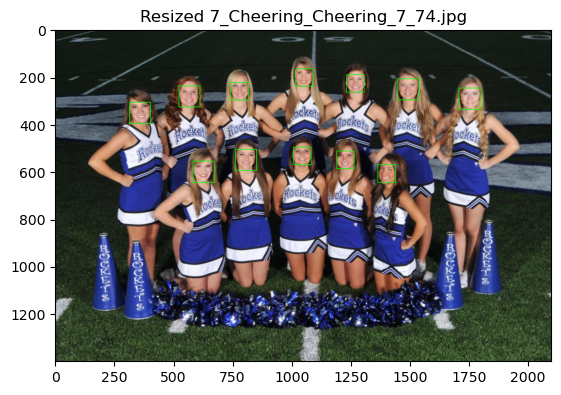

Before resizing the image, the original shape of image is (626, 1024, 3)
7_Cheering_Cheering_7_543.jpg 21


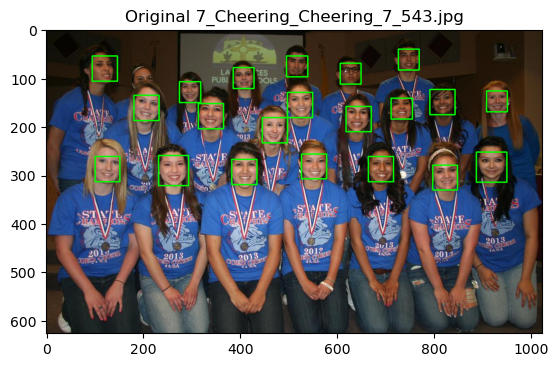

After resizing the image, the new shape of image is (1400, 2290, 3)
7_Cheering_Cheering_7_543.jpg 21


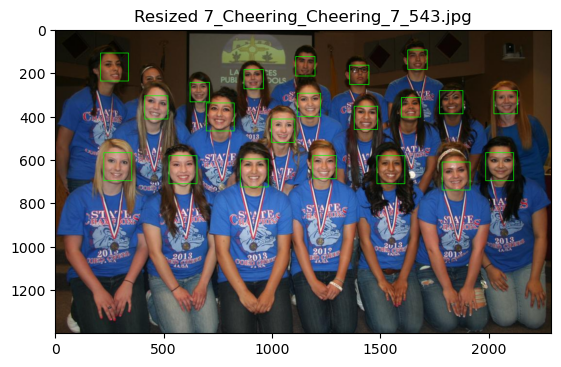

Before resizing the image, the original shape of image is (768, 1024, 3)
7_Cheering_Cheering_7_889.jpg 7


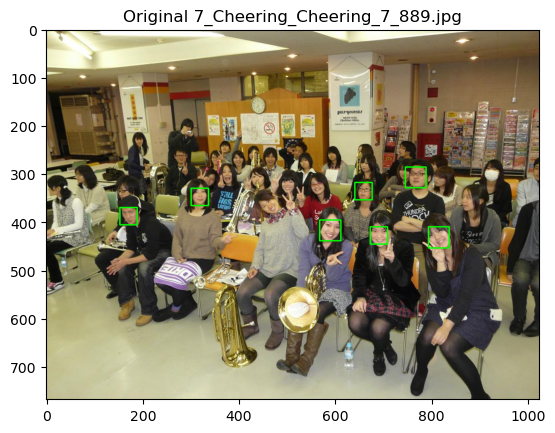

After resizing the image, the new shape of image is (1400, 1866, 3)
7_Cheering_Cheering_7_889.jpg 14


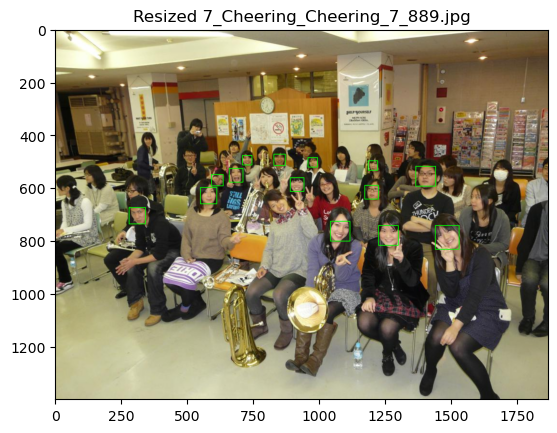

In [14]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
  # Enter your code here and remove the following pass (20%)
  for img_name in annotate_dict.keys():
    # set the path
    image_path = os.path.join(data_dir, img_name)
    # read the image
    img = cv2.imread(image_path) # type of img is uint8, which is the format of cv::Mat type
    if img is None: # error handling
      print(f"The {image_path} doesn't exist.")
      continue # skip it
    ''''
    * bbox representation:  
    [152 141 196 193]  
    [x1, y1, x2, y2]  
    (x1, y1) : upper-left  
    (x1, y1) : lower-right
    '''
    for bbox in annotate_dict[img_name]:
      x1, y1, x2, y2 = bbox
      # remember to copy the img file, img.copy() created a new, writable, and contiguous array
      img = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), thickness=2) # add green bounding box
      
    img = img[:,:,::-1] # convert from BGR to RGB
    # show the image
    plt.title(img_name)
    plt.imshow(img)
    plt.show()


def save_bbox():
  save_dir = 'save_dir' # Do not change this line
  if not os.path.exists(save_dir):
    os.mkdir(save_dir)

  # Enter your code here (20%)    
  for img_name in annotate_dict.keys():
    # set the path
    image_path = os.path.join(data_dir, img_name)
    # read the image
    img = cv2.imread(image_path) # type of img is uint8, which is the format of cv::Mat type
    if img is None: # error handling
      print(f"The {image_path} doesn't exist.")
      continue # skip it
    for j, bbox in enumerate(annotate_dict[img_name]):
      # crop points
      x1, y1, x2, y2 = bbox
      # crop faces according to bbox
      img_crop = img[y1:y2, x1:x2]
      # create the save_path for the cropped face
      save_name = img_name.split(".")[0] + "_" + str(j) + ".jpg"
      save_path = os.path.join(save_dir, save_name)# each crop face saved into one image
      # use cv2.imwrite() to save the cropped face
      cv2.imwrite(save_path, img_crop)
  print(f"Successfully save all the crop faces into {save_dir}.")
# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
  # Enter your code here and remove the following pass (30%)
  for img_name in annotate_dict.keys():
    # set the path
    image_path = os.path.join(data_dir, img_name)
    # read the image
    img = cv2.imread(image_path) # type of img is uint8, which is the format of cv::Mat type
    if img is None: # error handling
      print(f"The {image_path} doesn't exist.")
      continue # skip it

    print("Before resizing the image, the original shape of image is", img.shape)
    # Use dlib to detect faces
    detector = dlib.get_frontal_face_detector()
    dets = detector(img, 1)
    for det in dets:
      x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
      # draw bounding box based on x1, y1, x2, y2
      img = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), thickness=2) # add green bounding box
    
    print(f"\33[33m{img_name} {len(dets)}\33[0m")
    img = img[:,:,::-1] # convert from BGR to RGB
    # show the image
    plt.title("Original " + img_name)
    plt.imshow(img)
    plt.show()
    ##########################################################################################################
    img = cv2.imread(image_path) # type of img is uint8, which is the format of cv::Mat type
    if img is None: # error handling
      print(f"The {image_path} doesn't exist.")
      continue # skip it
    # get the shape of img
    H, W, C = img.shape
    # print(img.shape)
    ratio = H/W
    # New size
    height = 1400
    width = int(height / ratio)  # Ensure the height is an integer
    # resize the height to 1400, and H/W ratio doesn't change.
    img = cv2.resize(img.copy(), (width, height))
    # print(img.shape)

    print("After resizing the image, the new shape of image is", img.shape)
    # Use dlib to detect faces
    detector = dlib.get_frontal_face_detector()
    dets = detector(img, 1)
    for det in dets:
      x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
      # draw bounding box based on x1, y1, x2, y2
      img = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), thickness=2) # add green bounding box
    
    print(f"\33[33m{img_name} {len(dets)}\33[0m")
    img = img[:,:,::-1] # convert from BGR to RGB
    # show the image
    plt.title("Resized " + img_name)
    plt.imshow(img)
    plt.show()
  


if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()

See the details of image

In [15]:
for img_name in annotate_dict.keys():
    image_path = os.path.join(data_dir, img_name)
    img = cv2.imread(image_path)
    # img.shape is (H, W, C)
    print(img_name, img.shape, type(img))

7_Cheering_Cheering_7_74.jpg (683, 1024, 3) <class 'numpy.ndarray'>
7_Cheering_Cheering_7_543.jpg (626, 1024, 3) <class 'numpy.ndarray'>
7_Cheering_Cheering_7_889.jpg (768, 1024, 3) <class 'numpy.ndarray'>


See the number of bbox which means the number of faces in the image.

In [16]:
for idx, img_name in enumerate(annotate_dict.keys()):
    for bbox in annotate_dict[img_name]: # annotate_dict[img_name] contains is a list which consists of several bboxes
        print(idx, bbox)
    break

for idx, img_name in enumerate(annotate_dict.keys()):
    # count all the bbox
    count = 0
    for bbox in annotate_dict[img_name]: # annotate_dict[img_name] contains is a list which consists of several bboxes
        count += 1
    print(img_name, " total bbox: ", count)

0 [152 141 196 193]
0 [255 103 298 158]
0 [364  95 402 145]
0 [492  70 532 118]
0 [600  82 642 131]
0 [707  87 750 146]
0 [838 109 878 162]
0 [667 264 705 318]
0 [577 237 623 288]
0 [490 231 531 280]
0 [373 232 416 290]
0 [288 265 326 313]
7_Cheering_Cheering_7_74.jpg  total bbox:  12
7_Cheering_Cheering_7_543.jpg  total bbox:  22
7_Cheering_Cheering_7_889.jpg  total bbox:  35


* bbox representation:  
[152 141 196 193]  
[x1, y1, x2, y2]  
(x1, y1) : upper-left  
(x1, y1) : lower-right
